In [339]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn import metrics
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore') # Just to ignore warnings that might be thrown due to artifically formed data.

In [340]:
df = pd.read_csv('techSalaries2017.csv')

In [341]:
df

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
0,Oracle,Product Manager,"Redwood City, CA",127000,107000,20000.0,10000.0,1.5,1.5,NaN,...,0,0,0,NaN,NaN,38,68.590,5,829,2.13
1,eBay,Software Engineer,"San Francisco, CA",100000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,68.059,7,993,2.77
2,Amazon,Product Manager,"Seattle, WA",310000,155000,0.0,0.0,8.0,0.0,NaN,...,0,0,0,NaN,NaN,42,61.343,3,1200,3.26
3,Apple,Software Engineering Manager,"Sunnyvale, CA",372000,157000,180000.0,35000.0,7.0,5.0,NaN,...,0,0,0,NaN,NaN,28,66.495,3,1170,3.07
4,Microsoft,Software Engineer,"Mountain View, CA",157000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,69.015,2,1115,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,"Seattle, WA",327000,155000,150000.0,22000.0,10.0,1.0,NaN,...,0,0,0,NaN,NaN,52,64.792,6,1064,2.76
62638,Microsoft,Software Engineer,"Redmond, WA",237000,146900,73200.0,16000.0,2.0,2.0,NaN,...,0,0,0,NaN,NaN,21,69.483,9,1160,3.27
62639,MSFT,Software Engineer,"Seattle, WA",220000,157000,25000.0,20000.0,14.0,12.0,NaN,...,0,0,0,NaN,NaN,43,62.331,12,1014,2.78
62640,Salesforce,Software Engineer,"San Francisco, CA",280000,194688,57000.0,29000.0,8.0,4.0,NaN,...,0,0,0,NaN,NaN,48,70.357,10,1109,3.04


# 

# Question 1

In [342]:
df = df.dropna()
df

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,Male,...,0,0,0,Asian,PhD,45,68.891,9,1166,3.04
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,Male,...,1,0,0,Two Or More,Bachelor's Degree,24,61.454,12,1175,3.07
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,Male,...,0,0,0,Asian,Bachelor's Degree,25,65.455,1,1268,3.34
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,Male,...,0,0,0,Asian,Master's Degree,32,73.769,8,1070,2.75
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,Male,...,0,0,0,White,Bachelor's Degree,29,68.710,2,1187,3.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,Facebook,Software Engineering Manager,"Menlo Park, CA",1470000,290000,1100.0,80000.0,9.0,7.0,Male,...,0,0,0,Asian,Bachelor's Degree,31,68.402,12,1436,3.77
61982,Google,Product Manager,"San Francisco, CA",4500000,450000,3700.0,350000.0,20.0,14.0,Male,...,0,0,0,Asian,Master's Degree,57,69.195,6,1363,3.50
61984,Zapier,Software Engineering Manager,"Denver, CO",1605000,250000,1305.0,50000.0,16.0,2.0,Female,...,0,0,0,White,Master's Degree,55,66.902,11,1447,3.77
61987,Facebook,Software Engineering Manager,"Menlo Park, CA",2372000,315000,1933.0,124000.0,22.0,2.0,Male,...,0,1,0,Black,Master's Degree,50,62.691,8,1513,3.85


In [343]:
df["gender"] = np.where(df["gender"] == "Male", 0, 1)
df

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,0,...,0,0,0,Asian,PhD,45,68.891,9,1166,3.04
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,0,...,1,0,0,Two Or More,Bachelor's Degree,24,61.454,12,1175,3.07
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,0,...,0,0,0,Asian,Bachelor's Degree,25,65.455,1,1268,3.34
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,0,...,0,0,0,Asian,Master's Degree,32,73.769,8,1070,2.75
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,0,...,0,0,0,White,Bachelor's Degree,29,68.710,2,1187,3.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,Facebook,Software Engineering Manager,"Menlo Park, CA",1470000,290000,1100.0,80000.0,9.0,7.0,0,...,0,0,0,Asian,Bachelor's Degree,31,68.402,12,1436,3.77
61982,Google,Product Manager,"San Francisco, CA",4500000,450000,3700.0,350000.0,20.0,14.0,0,...,0,0,0,Asian,Master's Degree,57,69.195,6,1363,3.50
61984,Zapier,Software Engineering Manager,"Denver, CO",1605000,250000,1305.0,50000.0,16.0,2.0,1,...,0,0,0,White,Master's Degree,55,66.902,11,1447,3.77
61987,Facebook,Software Engineering Manager,"Menlo Park, CA",2372000,315000,1933.0,124000.0,22.0,2.0,0,...,0,1,0,Black,Master's Degree,50,62.691,8,1513,3.85


In [344]:
list(df.columns.values)

['company',
 'title',
 'location',
 'totalyearlycompensation',
 'basesalary',
 'stockgrantvalue',
 'bonus',
 'yearsofexperience',
 'yearsatcompany',
 'gender',
 'Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Some_College',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic',
 'Race',
 'Education',
 'Age',
 'Height',
 'Zodiac',
 'SAT',
 'GPA']

In [345]:
X_df_1 = df[["yearsofexperience", "yearsatcompany", "gender", "Masters_Degree", "Bachelors_Degree", "Doctorate_Degree", "Highschool", "Race_Asian", "Race_White", "Race_Black", "Race_Hispanic", "Age", "Height", "Zodiac", "SAT", "GPA"]]
y_df = df[["totalyearlycompensation"]]

0.2662964288810088


Text(0.5, 1.0, 'R^2 = 0.266')

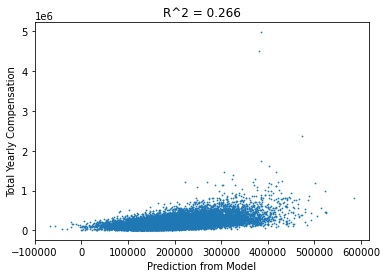

In [346]:
X_full = X_df_1.to_numpy()
y = y_df.to_numpy()
model = LinearRegression().fit(X_full, y)
rSqr = model.score(X_full, y)
print(rSqr)

yHat = model.predict(X_full)
plt.plot(yHat,y_full,'o',markersize=.75) 
plt.xlabel('Prediction from Model') 
plt.ylabel('Total Yearly Compensation')  
plt.title('R^2 = {:.3f}'.format(rSqr))

In [347]:
model = LinearRegression().fit(X_df_1[["yearsofexperience"]], y)
rSqr = model.score(X_df_1[["yearsofexperience"]], y)
print(rSqr)

0.162133461342705


In [348]:
model = LinearRegression().fit(X_df_1[["yearsatcompany"]], y)
rSqr = model.score(X_df_1[["yearsatcompany"]], y)
print(rSqr)

0.028185004588511142


In [349]:
model = LinearRegression().fit(X_df_1[["gender"]], y)
rSqr = model.score(X_df_1[["gender"]], y)
print(rSqr)

0.0013134572585739024


In [350]:
model = LinearRegression().fit(X_df_1[["Masters_Degree", "Bachelors_Degree", "Doctorate_Degree", "Highschool"]], y)
rSqr = model.score(X_df_1[["Masters_Degree", "Bachelors_Degree", "Doctorate_Degree", "Highschool"]], y)
print(rSqr)

0.03668704986239801


In [351]:
model = LinearRegression().fit(X_df_1[["Race_Asian", "Race_White", "Race_Black", "Race_Hispanic"]], y)
rSqr = model.score(X_df_1[["Race_Asian", "Race_White", "Race_Black", "Race_Hispanic"]], y)
print(rSqr)

0.0027771695169861443


In [352]:
model = LinearRegression().fit(X_df_1[["Age"]], y)
rSqr = model.score(X_df_1[["Age"]], y)
print(rSqr)

0.06474417322866977


In [353]:
model = LinearRegression().fit(X_df_1[["Height"]], y)
rSqr = model.score(X_df_1[["Height"]], y)
print(rSqr)

0.00013707828289288848


In [354]:
model = LinearRegression().fit(X_df_1[["Zodiac"]], y)
rSqr = model.score(X_df_1[["Zodiac"]], y)
print(rSqr)

7.639055778330128e-05


In [355]:
model = LinearRegression().fit(X_df_1[["SAT"]], y)
rSqr = model.score(X_df_1[["SAT"]], y)
print(rSqr)

0.11071695461350883


In [356]:
model = LinearRegression().fit(X_df_1[["GPA"]], y)
rSqr = model.score(X_df_1[["GPA"]], y)
print(rSqr)

0.0932610964556061


0.162133461342705


Text(0.5, 1.0, 'R^2 = 0.162')

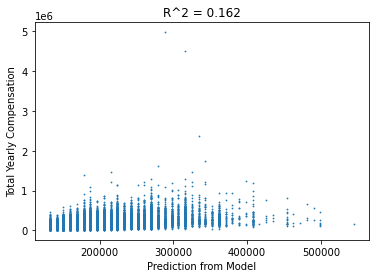

In [357]:
X_best = X_df_1[["yearsofexperience"]].to_numpy()
model = LinearRegression().fit(X_best, y)
rSqr = model.score(X_best, y)
print(rSqr)

yHat = model.predict(X_best)
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from Model') 
plt.ylabel('Total Yearly Compensation')  
plt.title('R^2 = {:.3f}'.format(rSqr))

# Question 2

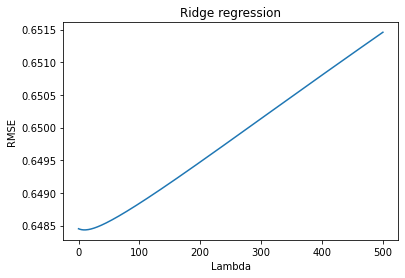

Optimal lambda: 10.0


In [358]:
lambdas = np.linspace(0,500,1001)
cont = np.empty([len(lambdas),2])*np.NaN

X_df_quant = df[["yearsofexperience", "yearsatcompany", "Age", "Height", "SAT", "GPA"]]
X_df_cat = df[["gender", "Masters_Degree", "Bachelors_Degree", "Doctorate_Degree", "Highschool", "Race_Asian", "Race_White", "Race_Black", "Race_Hispanic", "Zodiac"]]

X_norm_quant = (X_df_quant - np.mean(X_df_quant, axis=0))/np.std(X_df_quant, axis=0)
X_norm_df = pd.concat([X_norm_quant, X_df_cat], axis=1)
y_norm_df = (y_df - np.mean(y_df, axis=0))/np.std(y_df, axis=0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_norm_df, y_norm_df, test_size=0.2, random_state=0)

for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(X_train, y_train)
    cont[ii,0] = lambdas[ii]
    error = metrics.mean_squared_error(y_test, ridgeModel.predict(X_test))
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1] == np.min(cont[:,1]))])

In [359]:
ridge_all = Ridge(alpha=10).fit(X_norm_df, y_norm_df)
p = ridge_all.predict(X_test)
print("R-Squared Value: ", metrics.r2_score(y_test, p))

R-Squared Value:  0.30389471835112924


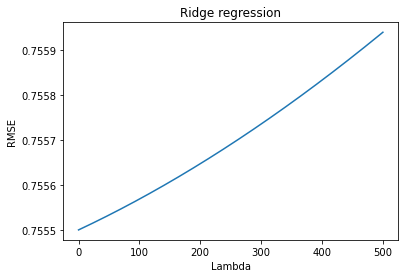

Optimal lambda: 0.0


In [360]:
lambdas = np.linspace(0,500,1001)
cont = np.empty([len(lambdas),2])*np.NaN

X_norm_best_df = (df[["yearsofexperience"]] - np.mean(df[["yearsofexperience"]], axis=0))/np.std(df[["yearsofexperience"]], axis=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_norm_best_df, y_norm_df, test_size=0.2, random_state=0)

for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(X_train, y_train)
    cont[ii,0] = lambdas[ii]
    error = metrics.mean_squared_error(y_test, ridgeModel.predict(X_test))
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1] == np.min(cont[:,1]))])

In [361]:
ridge_best = Ridge(alpha=0).fit(X_norm_best_df, y_norm_df)
p = ridge_best.predict(X_test)
print("R-Squared Value: ", metrics.r2_score(y_test, p))

R-Squared Value:  0.18769984501417192


# Question 3

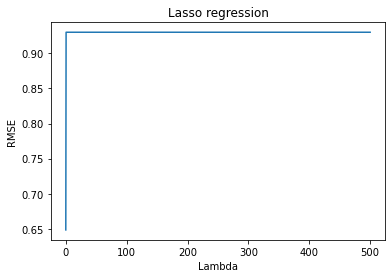

Optimal lambda: 0.0


In [362]:
lambdas = np.linspace(0,500,1001)
cont = np.empty([len(lambdas),2])*np.NaN

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_norm_df, y_norm_df, test_size=0.2, random_state=0)

for ii in range(len(lambdas)):
    lassoModel = Lasso(alpha=lambdas[ii]).fit(X_train, y_train)
    cont[ii,0] = lambdas[ii]
    error = metrics.mean_squared_error(y_test, lassoModel.predict(X_test))
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

In [363]:
lasso_all = Lasso(alpha=0).fit(X_norm_df, y_norm_df)
p = lasso_all.predict(X_test)
print("R-Squared Value: ", metrics.r2_score(y_test, p))
coef = lasso_all.coef_
num_zero_coefs = sum(abs(coef) < 1e-6)
print("Number of coefficients that have been shrunk to 0:", num_zero_coefs)

R-Squared Value:  0.30388907394264786
Number of coefficients that have been shrunk to 0: 0


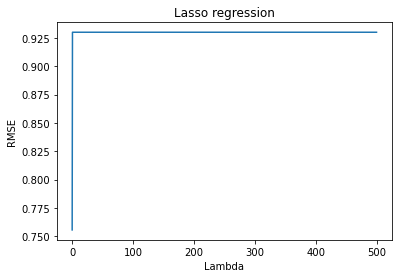

Optimal lambda: 0.0


In [364]:
lambdas = np.linspace(0,500,1001)
cont = np.empty([len(lambdas),2])*np.NaN

X_norm_best_df = (df[["yearsofexperience"]] - np.mean(df[["yearsofexperience"]], axis=0))/np.std(df[["yearsofexperience"]], axis=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_norm_best_df, y_norm_df, test_size=0.2, random_state=0)

for ii in range(len(lambdas)):
    lassoModel = Lasso(alpha=lambdas[ii]).fit(X_train, y_train)
    cont[ii,0] = lambdas[ii]
    error = metrics.mean_squared_error(y_test, lassoModel.predict(X_test))
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

In [365]:
lasso_best = Lasso(alpha=0).fit(X_norm_best_df, y_norm_df)
p = lasso_best.predict(X_test)
print("R-Squared Value: ", metrics.r2_score(y_test, p))
coef = lasso_best.coef_
num_zero_coefs = sum(abs(coef) < 1e-6)
print("Number of coefficients that have been shrunk to 0:", num_zero_coefs)

R-Squared Value:  0.18769984501417192
Number of coefficients that have been shrunk to 0: 0


# Question 4

In [366]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(y_df, df["gender"], test_size=0.3, random_state=0)
model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


              precision    recall  f1-score   support

           0       0.82      1.00      0.90      5292
           1       0.00      0.00      0.00      1185

    accuracy                           0.82      6477
   macro avg       0.41      0.50      0.45      6477
weighted avg       0.67      0.82      0.73      6477



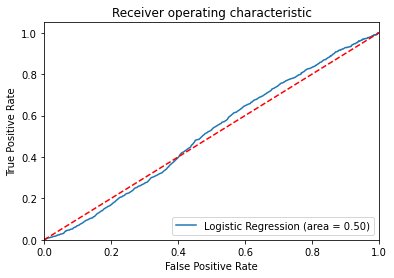

In [367]:
print(metrics.classification_report(y_test, y_pred))
model_roc_auc = metrics.roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [368]:
model.coef_

array([[-6.77043834e-06]])

In [369]:
X_df_2 = df[["totalyearlycompensation", "yearsofexperience", "yearsatcompany", "Masters_Degree", "Bachelors_Degree", "Doctorate_Degree", "Highschool", "Race_Asian", "Race_White", "Race_Black", "Race_Hispanic", "Age", "Height", "Zodiac", "SAT", "GPA"]]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df_2, df["gender"], test_size=0.3, random_state=0)
model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


              precision    recall  f1-score   support

           0       0.82      1.00      0.90      5292
           1       0.00      0.00      0.00      1185

    accuracy                           0.82      6477
   macro avg       0.41      0.50      0.45      6477
weighted avg       0.67      0.82      0.73      6477



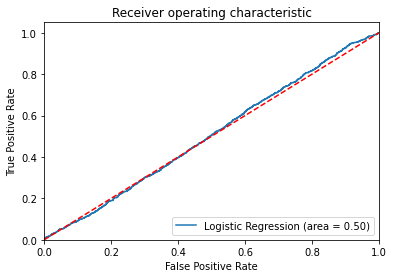

In [370]:
print(metrics.classification_report(y_test, y_pred))
model_roc_auc = metrics.roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [371]:
model.coef_

array([[-8.57818040e-07, -6.08184031e-06, -3.47021104e-06,
        -2.33255286e-07, -8.53271175e-07, -2.47171689e-08,
        -6.20531365e-08, -7.09185662e-07, -4.36386954e-07,
         1.84250281e-08, -1.00650664e-07, -4.23277335e-05,
        -8.12448726e-05, -7.76908676e-06, -1.21372230e-03,
        -3.32382462e-06]])

# Question 5

In [372]:
median = y_df.median()[0]
median

174000.0

In [373]:
y_df["paylevel"] = np.where(df["totalyearlycompensation"] >= median, 1, 0)

In [374]:
y_df

,totalyearlycompensation,paylevel
15710,400000,1
23532,136000,0
23533,337000,1
23534,222000,1
23535,187000,1
...,...,...
61981,1470000,1
61982,4500000,1
61984,1605000,1
61987,2372000,1


In [375]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["yearsofexperience"]], y_df["paylevel"], test_size=0.3, random_state=0)
model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


              precision    recall  f1-score   support

           0       0.63      0.72      0.67      3187
           1       0.68      0.58      0.63      3290

    accuracy                           0.65      6477
   macro avg       0.65      0.65      0.65      6477
weighted avg       0.65      0.65      0.65      6477



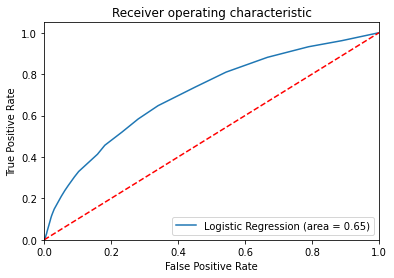

In [376]:
print(metrics.classification_report(y_test, y_pred))
model_roc_auc = metrics.roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [377]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["Age"]], y_df["paylevel"], test_size=0.3, random_state=0)
model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


              precision    recall  f1-score   support

           0       0.57      0.59      0.58      3187
           1       0.59      0.57      0.58      3290

    accuracy                           0.58      6477
   macro avg       0.58      0.58      0.58      6477
weighted avg       0.58      0.58      0.58      6477



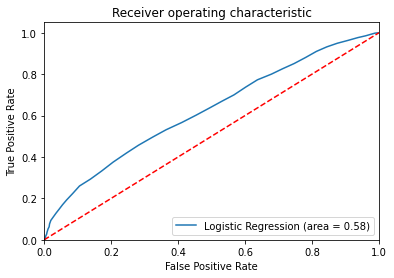

In [378]:
print(metrics.classification_report(y_test, y_pred))
model_roc_auc = metrics.roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [379]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["Height"]], y_df["paylevel"], test_size=0.3, random_state=0)
model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.49


              precision    recall  f1-score   support

           0       0.49      1.00      0.66      3187
           1       0.00      0.00      0.00      3290

    accuracy                           0.49      6477
   macro avg       0.25      0.50      0.33      6477
weighted avg       0.24      0.49      0.32      6477



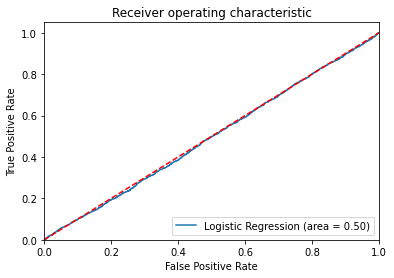

In [380]:
print(metrics.classification_report(y_test, y_pred))
model_roc_auc = metrics.roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [381]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["SAT"]], y_df["paylevel"], test_size=0.3, random_state=0)
model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


              precision    recall  f1-score   support

           0       0.60      0.57      0.59      3187
           1       0.60      0.63      0.62      3290

    accuracy                           0.60      6477
   macro avg       0.60      0.60      0.60      6477
weighted avg       0.60      0.60      0.60      6477



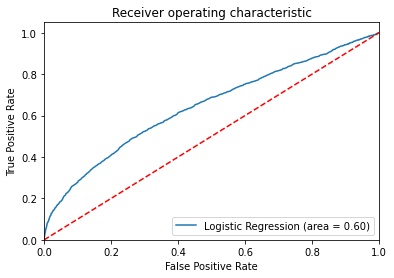

In [382]:
print(metrics.classification_report(y_test, y_pred))
model_roc_auc = metrics.roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [383]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["GPA"]], y_df["paylevel"], test_size=0.3, random_state=0)
model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.59


              precision    recall  f1-score   support

           0       0.59      0.58      0.58      3187
           1       0.60      0.61      0.60      3290

    accuracy                           0.59      6477
   macro avg       0.59      0.59      0.59      6477
weighted avg       0.59      0.59      0.59      6477



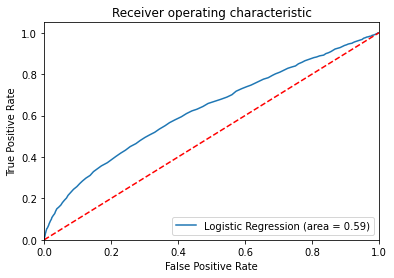

In [384]:
print(metrics.classification_report(y_test, y_pred))
model_roc_auc = metrics.roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Extra Credit 1

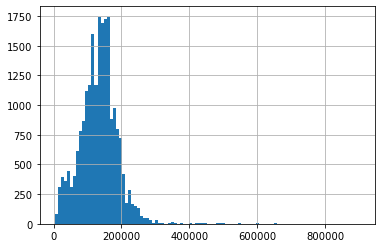

In [385]:
salary = df["basesalary"].hist(bins=100)

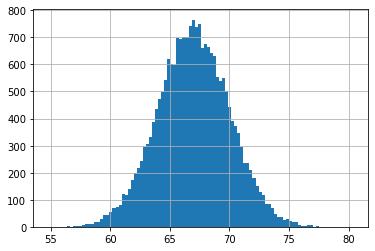

In [386]:
height = df["Height"].hist(bins=100)

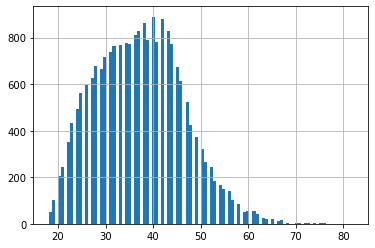

In [387]:
age = df["Age"].hist(bins=100)

# Extra Credit 2

In [388]:
model = LinearRegression().fit(X_df_1[["SAT"]], y)
rSqr = model.score(X_df_1[["SAT"]], y)
print(rSqr)

0.11071695461350883
